## Day 26 Lecture 2 Assignment

In this assignment, we will learn about linear regression model assumptions

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [0]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')



We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [0]:
# answer below:
dfdrop = lager.drop('beer', axis = 1)
dfclean = (dfdrop != 0).any(axis = 1).value_counts()
dfclean
dfdrop.columns

Index(['tpc', 'ma', 'dsa', 'asa', 'orac', 'rp', 'mca'], dtype='object')

Split the data into train and test subsets. Select 25% of the data to be in the test subset. Use `tpc` as the y variable.

In [0]:
# answer below:

from sklearn.model_selection import train_test_split

X = dfdrop.drop('tpc', axis = 1)
y = dfdrop['tpc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)



Next, we'll generate a linear model and plot the residual vs. fit plot.

What are the coefficients, and what are their significance?

In [0]:
# answer below:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  classification_report, confusion_matrix
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[  1.1112521  141.44562382   1.72873908   0.63476872  86.3087539
   0.25688263]
-0.2948194583389636


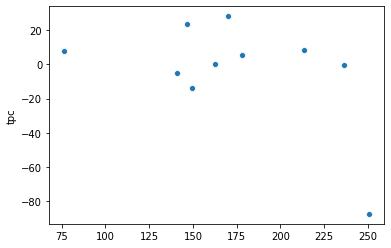

In [0]:
import seaborn as sns
prediction = lr.predict(X_test)
residual = y_test-prediction
sns.scatterplot(prediction, residual)

Compute the VIF for all features in the model

In [0]:
# answer below:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(dfdrop[['ma', 'dsa', 'asa', 'orac', 'rp', 'mca']])
pd.Series([variance_inflation_factor(X.values, i)
  for i in range(X.shape[1])], index = X.columns)

const    25.231110
ma        1.408874
dsa       2.752283
asa       1.824640
orac      1.631315
rp        2.357123
mca       1.485338
dtype: float64

Plot the qq-plot for our errors (make sure to standardize the errors to compare to the standard normal distribtion):

In [0]:
print(residual.values)
print(residual.values.reshape(-1,1))
print(residual.values[-1])

[  0.33304753   8.11111689   8.27184472  23.78112299  28.28413259
  -4.9134936   -0.23683437   5.66474318 -87.59585476 -13.6031428 ]
[[  0.33304753]
 [  8.11111689]
 [  8.27184472]
 [ 23.78112299]
 [ 28.28413259]
 [ -4.9134936 ]
 [ -0.23683437]
 [  5.66474318]
 [-87.59585476]
 [-13.6031428 ]]
-13.603142795401652


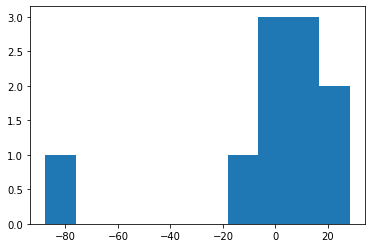

In [0]:
plt.hist(residual)
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
bc = PowerTransformer(method='box-cox')
from sklearn.preprocessing import StandardScaler

residualscaled = StandardScaler().fit_transform(residual.values.reshape(-1,1))


(array([1., 0., 0., 0., 0., 0., 1., 3., 3., 2.]),
 array([-2.76591635, -2.38618486, -2.00645336, -1.62672187, -1.24699038,
        -0.86725889, -0.4875274 , -0.10779591,  0.27193558,  0.65166708,
         1.03139857]),
 <a list of 10 Patch objects>)

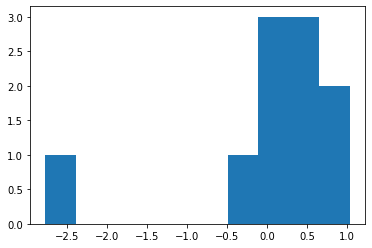

In [0]:
plt.hist(residualscaled)

<function matplotlib.pyplot.show>

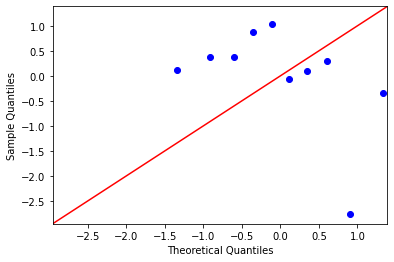

In [0]:
# answer below:

import statsmodels.api as sm
import pylab
sm.qqplot(residualscaled, line= '45')
pylab.show

